#                        Microsoft Project

## Business Problem


The Business understanding

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Requirements

1. Load the data with pandas library

 Create the folderholding the files using glob. Use pandas to inspect all the shape, missing values and other   attributes for all the files in the folder.
 

2. Perform data cleaning for ease of data

The first question is: What is the best 

  
 In order to answer this question, you will need to:

Identify and handle missing valuesfor every data set.
Identify and handle text data requiring cleaning.


### Importing of relevant liabriries

In [1]:
#import pandas and Glob Libraries
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

## 1. Loading  of data set with Pandas

In [56]:
#loading the entire file
df = pd.DataFrame(glob("/home/sarah/Documents/Phase1_Project/Microsoft Project-Phase 1/Phase-1-project/Data_Project/*"))


In [58]:
#Naming the first column
df.columns = ["Data_Project"]

In [59]:
df

,Data_Project
0,/home/sarah/Documents/Phase1_Project/Microsoft...
1,/home/sarah/Documents/Phase1_Project/Microsoft...
2,/home/sarah/Documents/Phase1_Project/Microsoft...
3,/home/sarah/Documents/Phase1_Project/Microsoft...
4,/home/sarah/Documents/Phase1_Project/Microsoft...
5,/home/sarah/Documents/Phase1_Project/Microsoft...
6,/home/sarah/Documents/Phase1_Project/Microsoft...
7,/home/sarah/Documents/Phase1_Project/Microsoft...
8,/home/sarah/Documents/Phase1_Project/Microsoft...
9,/home/sarah/Documents/Phase1_Project/Microsoft...


In [5]:
#Checking the first row of the entire folder
df["Phase1_project"].iloc[0]

'/home/sarah/Downloads/Data_Project/title.akas.csv'

## 2. Performing of Data cleaning.

#### Title_akas

In [6]:
 title_akas = pd.read_csv("/home/sarah/Downloads/Data_Project/title.akas.csv")

In [7]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [8]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


"""There are missing values in region, language, attibutes and is_original_title. There are inte64 values in ordering and float64 for is_original_title"""

In [9]:
title_akas.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [10]:
#Drop cilumns with more missing values
title_akas.drop(["language", "attributes"], axis = 1)

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0
...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,original,1.0
331699,tt9827784,3,Farewell Song,XWW,imdbDisplay,0.0
331700,tt9880178,1,La atención,NaN,original,1.0
331701,tt9880178,2,La atención,ES,NaN,0.0


In [11]:
# Check for uniques values 
title_akas1 = pd.unique(title_akas["title_id"])
len(title_akas1)

122302

In [12]:
#Drop dulpicate values in the title_id column
title_akas2 = title_akas.drop_duplicates(subset=["title_id"])
title_akas2

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
48,tt0381957,1,Cloud Cuckoo Land,GB,NaN,NaN,NaN,0.0
49,tt0401729,10,Джон Картер: Мiж двох свiтiв,UA,NaN,NaN,NaN,0.0
83,tt10010134,1,Versailles Rediscovered - The Sun King's Vanis...,NaN,NaN,original,NaN,1.0
86,tt10027708,1,Miguelito - Canto a Borinquen,NaN,NaN,original,NaN,1.0
...,...,...,...,...,...,...,...,...
331689,tt9723084,1,Anderswo. Allein in Afrika,DE,NaN,imdbDisplay,NaN,0.0
331691,tt9726638,1,Qi Tian Da Sheng 2,CN,yue,imdbDisplay,NaN,0.0
331694,tt9755806,1,Big Shark,US,NaN,NaN,NaN,0.0
331697,tt9827784,1,Sayonara kuchibiru,JP,NaN,NaN,NaN,0.0


In [13]:
# check data of mising values after dropping title_id
title_akas2.isna().sum()

title_id                  0
ordering                  0
title                     0
region                14813
language             115132
types                 93141
attributes           119688
is_original_title        14
dtype: int64

#### bom_movies_gross

In [14]:
#Checking of info in every data set.
bom_movies_gross = pd.read_csv("/home/sarah/Downloads/Data_Project/bom.movie_gross.csv")
bom_movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [15]:
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
""" There are 3,387 rows in the data set. There are missing values in Studio, domestic_gross and foreign_gross. There are a total of five columns in the data set.With domestic_gross having a float value and title and studio being objects.
"""

' There are 3,387 rows in the data set. There are missing values in Studio, domestic_gross and foreign_gross. There are a total of five columns in the data set.With domestic_gross having a float value and title and studio being objects.\n'

In [17]:
# Checking for unique values
bom_movies1 = pd.unique(bom_movies_gross["title"])
len(bom_movies1)


3386

In [18]:
#creating a non null of foreign gross
non_null = bom_movies_gross[bom_movies_gross["foreign_gross"].notna()]
non_null

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [19]:
#Remove commas 
non_null.foreign_gross.str.replace(',', '').astype(float).astype(int)

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3275      1500000
3286       229000
3309       256000
3342         5200
3353        30000
Name: foreign_gross, Length: 2037, dtype: int64

In [20]:
#checking for missing values
bom_movies_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [21]:
#We have missing values in studio , domestic_gross and foreign gross. We however going to remove the rows in studio and domestic gross and replace the values in foreign gross

In [22]:
mean = bom_movies_gross["domestic_gross"].mean()
median = bom_movies_gross["domestic_gross"].median
mode = bom_movies_gross["domestic_gross"].mode
print({'mean':mean, 'median':median, 'median':median, "mode":mode})

{'mean': 28745845.06698422, 'median': <bound method Series.median of 0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64>, 'mode': <bound method Series.mode of 0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64>}


#### name_basics

In [23]:
name_basics = pd.read_csv("/home/sarah/Downloads/Data_Project/name.basics.csv")

In [24]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [25]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [26]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [27]:
"""There are missing string values from death year, birth year, primary profession and known for titles. We have object and floa64 data type."""

'There are missing string values from death year, birth year, primary profession and known for titles. We have object and floa64 data type.'

In [28]:
name_basics.drop(["birth_year", "death_year"], axis = 1)

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...
606643,nm9990381,Susan Grobes,actress,NaN
606644,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,producer,NaN


In [29]:

"""We have managed to remove the birth_year and death_year columns from our data set"""

'We have managed to remove the birth_year and death_year columns from our data set'

#### title_principals

In [30]:
title_principals = pd.read_csv("/home/sarah/Downloads/Data_Project/title.principals.csv")

In [31]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [32]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [33]:
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

"""There is a column of int64 The data types seem to line up with what we expect. The columns
containing strings are type object.

We can see that there are missing/Non-null values in the job and
characters columns, since there are 1028186 total rows and each of those
columns contains fewer 1028186 non-null values
"""

#### title_ratings

In [34]:
title_ratings = pd.read_csv("/home/sarah/Downloads/Data_Project/title.ratings.csv")

In [35]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [36]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [37]:
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

"""There are no missing values in the data set. There is a total of 73856 rows in the data set. The data set contains string values which is object represented by tconst column. A float64 column represented by averagerating as well as int64 which is integar represented by numvotes column"""

#### tmdb_movies

In [38]:
tmdb_movies = pd.read_csv("/home/sarah/Downloads/Data_Project/tmdb.movies (1).csv")

In [39]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [40]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


"""The data set has a total of 26517 rows and a total of 10 columns, with no missing values in any of the columns. The data set has int64,float64 and string.


"""

In [41]:
#Get the available columns available in the data set
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [42]:
#Drop the unnamed column which is similar to the index column
tmdb_movies = tmdb_movies.drop(['Unnamed: 0'], axis=1)
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [43]:
#sort the table in vote counts
tmdb_movies = tmdb_movies.sort_values("vote_count", ascending=False)
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
...,...,...,...,...,...,...,...,...,...
14071,[],312155,en,Merely Players,0.600,2014-12-16,Merely Players,3.0,1
14075,[],287781,en,24 Hours,0.600,2014-07-25,24 Hours,3.0,1
14078,[27],274257,en,The First Wave,0.600,2014-01-10,The First Wave,3.0,1
14087,[35],365539,en,Cinema Purgatorio,0.600,2014-06-01,Cinema Purgatorio,2.5,1


In [44]:
"""The movies with the most votes is Inception with a total of 22186 votes"""

'The movies with the most votes is Inception with a total of 22186 votes'

In [45]:
#sort by popularity
tmdb_movies = tmdb_movies.sort_values("popularity", ascending=False)
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...
17124,[878],358622,en,No-A,0.600,2015-09-02,No-A,5.0,2
2292,[99],54887,en,BluScenes: Underwater Cozumel,0.600,2010-11-23,BluScenes: Underwater Cozumel,4.8,2
2293,"[28, 12]",50986,en,Light the Wick,0.600,2010-11-15,Light the Wick,4.8,2
17125,"[16, 27]",357421,en,Isolated,0.600,2015-01-12,Isolated,5.0,2


In [46]:
"""The most popular movie is Avengers: Infinity war with 13948 votes, This means that people preferred the movie"""

'The most popular movie is Avengers: Infinity war with 13948 votes, This means that people preferred the movie'

In [47]:
#columns with popularity >1
tmdb_movies = tmdb_movies[tmdb_movies["popularity"] > 1]
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...
12714,[99],253297,en,That Guy Dick Miller,1.001,2014-03-07,That Guy Dick Miller,7.9,9
15863,"[10749, 35, 18]",286540,en,Glitch,1.001,2015-07-07,Glitch,4.7,3
3964,"[35, 27]",102116,en,"Paper Rock, Scissors",1.001,2011-09-12,"Paper Rock, Scissors",4.5,3
19179,"[18, 878, 53]",402592,en,Electric Nostalgia,1.001,2016-06-09,Electric Nostalgia,8.7,3


## Data visualisation

NameError: name 'x' is not defined

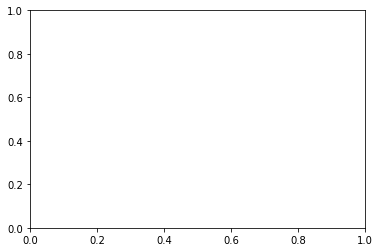

In [48]:
#The relationship between the Original title and vote count
# Create the plot
fig, ax = plt.subplots()

# Graph X vs height as a bar graph
ax.bar(x, )

# Set title
ax.set_title("Bar plot showing the vote count and the original title")

# Set labels for X and Y axes
ax.set_xlabel("X Values - vote_count")
ax.set_ylabel("Y Values - original_title")

# Set text of legend
ax.legend(["Sample Data"]);

In [ ]:
# Create the plot
fig, ax = plt.subplots()

# Graph X vs. Y as a scatter plot
ax.scatter(tmdb_movies['popularity'] ,tmdb_movies['vote_count'])

# Set title
ax.set_title("relationship between popularity and vote count")

# Set labels for X and Y axes
ax.set_xlabel("popularity")
ax.set_ylabel("vote_count")

#### title_basics

In [ ]:
title_basics = pd.read_csv("/home/sarah/Downloads/Data_Project/title.basics.csv")

In [ ]:
title_basics.head()

In [ ]:
title_basics.info()

In [ ]:
"""There are a total of 146144 rows and 6 columns. There are missing values in Orriginal_title 21 values, genres 5408 and runtme_minutes with 31718. We have object type, integar and float64 type of data."""

In [ ]:
#finding the mean, mode and median of run time

mean = title_basics["runtime_minutes"].mean()
median = title_basics["runtime_minutes"].median()
mode = title_basics["runtime_minutes"].mode()
print({'mean':mean, 'median':median, 'median':median, "mode":mode})

In [ ]:
#replace runtime_minutes with Median
title_basics = title_basics.fillna(title_basics["runtime_minutes"].mean())
title_basics

In [ ]:
# Check for info
title_basics.info()

In [ ]:
# confirm that the values replaced have been correctly added
title_basics.isna().sum()

In [ ]:
#Check for the year of pproduction of movies
title_basics1 = pd.unique(title_basics['start_year'])
title_basics1

In [ ]:
#check all values of data with movies produced before 2023
title_basics = title_basics[""]

#### movie_budget

In [ ]:
movie_budgets = pd.read_csv("/home/sarah/Downloads/Data_Project/tn.movie_budgets.csv")

In [ ]:
movie_budgets.head()

In [ ]:
movie_budgets.info()

In [ ]:
#checking for missing data
movie_budgets.isna().sum()

In [ ]:
"""There are no missing values in the data set, We have inte64 and object as Data type.There are 5782 rows and 6 columns"""

In [ ]:
domestic_gross_not_null = movie_budgets[movie_budgets['domestic_gross'].notnull()]
domestic_gross_not_null

In [ ]:
#convert foreign values from object to int values.
domestic_gross_values= domestic_gross_not_null.domestic_gross.str.replace("$" , " ")
domestic_gross_values

In [ ]:
domestic_gross_values.head()

In [ ]:
domestic_gross_values= domestic_gross_not_null.domestic_gross.str.replace("," , " ").replace("$", " ")
domestic_gross_values

### Data visualisation

In [ ]:
# Plot a graph showing the relationship between 